# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [14]:
import itertools
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 9s 189us/step - loss: 0.7673 - accuracy: 0.7279 - val_loss: 1.6129 - val_accuracy: 0.5027
Epoch 49/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.7604 - accuracy: 0.7300 - val_loss: 1.6373 - val_accuracy: 0.5135
Epoch 50/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.7392 - accuracy: 0.7371 - val_loss: 1.7347 - val_accuracy: 0.4757
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______

50000/50000 [==============================] - 11s 222us/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3175 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3077 - accuracy: 0.1025 - val_loss: 2.3160 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3079 - accuracy: 0.0988 - val_loss: 2.3116 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3077 - accuracy: 0.1017 - val_loss: 2.3151 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.3074 - accuracy: 0.1017 - val_loss: 2.3185 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.3080 - accuracy: 0.1015 - val_loss: 2.3134 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________

50000/50000 [==============================] - 11s 218us/step - loss: 1.4146 - accuracy: 0.4966 - val_loss: 1.5122 - val_accuracy: 0.4656
Epoch 43/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.4151 - accuracy: 0.4973 - val_loss: 1.4990 - val_accuracy: 0.4679
Epoch 44/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4072 - accuracy: 0.5009 - val_loss: 1.5469 - val_accuracy: 0.4551
Epoch 45/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4005 - accuracy: 0.5019 - val_loss: 1.5908 - val_accuracy: 0.4478
Epoch 46/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4040 - accuracy: 0.5019 - val_loss: 1.5648 - val_accuracy: 0.4545
Epoch 47/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3950 - accuracy: 0.5038 - val_loss: 1.6024 - val_accuracy: 0.4343
Epoch 48/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.3870 - accuracy: 0.5073 - va

50000/50000 [==============================] - 12s 238us/step - loss: 2.3070 - accuracy: 0.0981 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.3070 - accuracy: 0.0984 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.3080 - accuracy: 0.0974 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.3069 - accuracy: 0.0991 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.3065 - accuracy: 0.0990 - val_loss: 2.3081 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.3071 - accuracy: 0.1007 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.3067 - accuracy: 0.0998 - va

50000/50000 [==============================] - 9s 189us/step - loss: 1.3333 - accuracy: 0.5326 - val_loss: 1.5007 - val_accuracy: 0.4654
Epoch 37/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3234 - accuracy: 0.5371 - val_loss: 1.4747 - val_accuracy: 0.4742
Epoch 38/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.3156 - accuracy: 0.5385 - val_loss: 1.5364 - val_accuracy: 0.4547
Epoch 39/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.3144 - accuracy: 0.5404 - val_loss: 1.4588 - val_accuracy: 0.4783
Epoch 40/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3045 - accuracy: 0.5419 - val_loss: 1.4533 - val_accuracy: 0.4928
Epoch 41/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2948 - accuracy: 0.5463 - val_loss: 1.4673 - val_accuracy: 0.4849
Epoch 42/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.2870 - accuracy: 0.5492 - val_lo

50000/50000 [==============================] - 11s 226us/step - loss: 1.8100 - accuracy: 0.3446 - val_loss: 1.9870 - val_accuracy: 0.2975
Epoch 34/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.8086 - accuracy: 0.3474 - val_loss: 1.8461 - val_accuracy: 0.3368
Epoch 35/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8113 - accuracy: 0.3465 - val_loss: 1.8129 - val_accuracy: 0.3451
Epoch 36/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.8037 - accuracy: 0.3495 - val_loss: 1.8471 - val_accuracy: 0.3337
Epoch 37/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.7994 - accuracy: 0.3502 - val_loss: 1.9349 - val_accuracy: 0.3033
Epoch 38/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7974 - accuracy: 0.3537 - val_loss: 1.8329 - val_accuracy: 0.3463
Epoch 39/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7973 - accuracy: 0.3530 - va

50000/50000 [==============================] - 10s 210us/step - loss: 1.2323 - accuracy: 0.5663 - val_loss: 1.5018 - val_accuracy: 0.4661
Epoch 31/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2232 - accuracy: 0.5708 - val_loss: 1.4050 - val_accuracy: 0.5121
Epoch 32/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.2153 - accuracy: 0.5720 - val_loss: 1.4162 - val_accuracy: 0.4970
Epoch 33/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2049 - accuracy: 0.5771 - val_loss: 1.3837 - val_accuracy: 0.5115
Epoch 34/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.1964 - accuracy: 0.5795 - val_loss: 1.3782 - val_accuracy: 0.5152
Epoch 35/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1880 - accuracy: 0.5833 - val_loss: 1.4492 - val_accuracy: 0.4951
Epoch 36/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.1821 - accuracy: 0.5835 - va

50000/50000 [==============================] - 12s 243us/step - loss: 1.5128 - accuracy: 0.4568 - val_loss: 1.5699 - val_accuracy: 0.4328
Epoch 28/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.5074 - accuracy: 0.4576 - val_loss: 1.5897 - val_accuracy: 0.4304
Epoch 29/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.4984 - accuracy: 0.4627 - val_loss: 1.5379 - val_accuracy: 0.4490
Epoch 30/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5008 - accuracy: 0.4635 - val_loss: 1.6117 - val_accuracy: 0.4303
Epoch 31/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.4938 - accuracy: 0.4629 - val_loss: 1.5455 - val_accuracy: 0.4507
Epoch 32/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4958 - accuracy: 0.4640 - val_loss: 1.5381 - val_accuracy: 0.4598
Epoch 33/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4893 - accuracy: 0.4667 - va

50000/50000 [==============================] - 9s 190us/step - loss: 1.8023 - accuracy: 0.3729 - val_loss: 1.8042 - val_accuracy: 0.3707
Epoch 25/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7959 - accuracy: 0.3760 - val_loss: 1.7980 - val_accuracy: 0.3713
Epoch 26/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.7896 - accuracy: 0.3780 - val_loss: 1.7916 - val_accuracy: 0.3766
Epoch 27/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7838 - accuracy: 0.3798 - val_loss: 1.7866 - val_accuracy: 0.3764
Epoch 28/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7780 - accuracy: 0.3820 - val_loss: 1.7800 - val_accuracy: 0.3778oss: 1.779
Epoch 29/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.7724 - accuracy: 0.3834 - val_loss: 1.7751 - val_accuracy: 0.3811
Epoch 30/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7670 - accuracy: 0.3861

50000/50000 [==============================] - 11s 219us/step - loss: 1.2299 - accuracy: 0.5594 - val_loss: 1.5888 - val_accuracy: 0.4550
Epoch 22/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.2140 - accuracy: 0.5656 - val_loss: 1.4683 - val_accuracy: 0.4952
Epoch 23/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1954 - accuracy: 0.5729 - val_loss: 1.6340 - val_accuracy: 0.4678
Epoch 24/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1725 - accuracy: 0.5810 - val_loss: 1.6423 - val_accuracy: 0.4669
Epoch 25/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.1524 - accuracy: 0.5866 - val_loss: 1.5885 - val_accuracy: 0.4818
Epoch 26/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1369 - accuracy: 0.5920 - val_loss: 1.5915 - val_accuracy: 0.4806
Epoch 27/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.1222 - accuracy: 0.6000 - va

50000/50000 [==============================] - 11s 212us/step - loss: 1.4332 - accuracy: 0.5001 - val_loss: 1.4826 - val_accuracy: 0.4718
Epoch 19/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4240 - accuracy: 0.5010 - val_loss: 1.4823 - val_accuracy: 0.4747
Epoch 20/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4157 - accuracy: 0.5056 - val_loss: 1.4585 - val_accuracy: 0.4845
Epoch 21/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4059 - accuracy: 0.5096 - val_loss: 1.4646 - val_accuracy: 0.4760
Epoch 22/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.3975 - accuracy: 0.5120 - val_loss: 1.5296 - val_accuracy: 0.4576
Epoch 23/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.3907 - accuracy: 0.5131 - val_loss: 1.4653 - val_accuracy: 0.4814
Epoch 24/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.3811 - accuracy: 0.5197 - va

50000/50000 [==============================] - 12s 245us/step - loss: 1.2326 - accuracy: 0.5603 - val_loss: 1.3531 - val_accuracy: 0.5241
Epoch 16/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.2162 - accuracy: 0.5676 - val_loss: 1.3759 - val_accuracy: 0.5138
Epoch 17/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.1870 - accuracy: 0.5758 - val_loss: 1.4153 - val_accuracy: 0.4973
Epoch 18/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.1742 - accuracy: 0.5800 - val_loss: 1.4068 - val_accuracy: 0.5106
Epoch 19/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.1491 - accuracy: 0.5909 - val_loss: 1.3632 - val_accuracy: 0.5221
Epoch 20/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.1288 - accuracy: 0.5991 - val_loss: 1.3587 - val_accuracy: 0.5259
Epoch 21/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.1109 - accuracy: 0.6038 - va

50000/50000 [==============================] - 7s 143us/step - loss: 2.1933 - accuracy: 0.2058 - val_loss: 2.1882 - val_accuracy: 0.2073
Epoch 13/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1867 - accuracy: 0.2081 - val_loss: 2.1818 - val_accuracy: 0.2101
Epoch 14/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.1805 - accuracy: 0.2112 - val_loss: 2.1757 - val_accuracy: 0.2124
Epoch 15/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.1745 - accuracy: 0.2141 - val_loss: 2.1697 - val_accuracy: 0.2147
Epoch 16/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1687 - accuracy: 0.2170 - val_loss: 2.1640 - val_accuracy: 0.2177
Epoch 17/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.1631 - accuracy: 0.2197 - val_loss: 2.1584 - val_accuracy: 0.2200
Epoch 18/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1576 - accuracy: 0.2227 - val_loss:

50000/50000 [==============================] - 9s 181us/step - loss: 1.4886 - accuracy: 0.4753 - val_loss: 1.5190 - val_accuracy: 0.4569
Epoch 10/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.4640 - accuracy: 0.4853 - val_loss: 1.5477 - val_accuracy: 0.4424
Epoch 11/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4435 - accuracy: 0.4901 - val_loss: 1.6978 - val_accuracy: 0.4257
Epoch 12/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4243 - accuracy: 0.4986 - val_loss: 1.5385 - val_accuracy: 0.4566
Epoch 13/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4015 - accuracy: 0.5067 - val_loss: 1.5615 - val_accuracy: 0.4462
Epoch 14/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.3833 - accuracy: 0.5101 - val_loss: 1.5044 - val_accuracy: 0.4658
Epoch 15/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3640 - accuracy: 0.5195 - val_loss:

50000/50000 [==============================] - 9s 171us/step - loss: 1.8224 - accuracy: 0.3651 - val_loss: 1.8205 - val_accuracy: 0.3649
Epoch 7/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.8098 - accuracy: 0.3691 - val_loss: 1.8092 - val_accuracy: 0.3707
Epoch 8/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.7991 - accuracy: 0.3746 - val_loss: 1.8022 - val_accuracy: 0.3736
Epoch 9/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7896 - accuracy: 0.3774 - val_loss: 1.7922 - val_accuracy: 0.3756
Epoch 10/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7814 - accuracy: 0.3820 - val_loss: 1.7844 - val_accuracy: 0.3771
Epoch 11/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.7737 - accuracy: 0.3834 - val_loss: 1.7791 - val_accuracy: 0.3808
Epoch 12/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7673 - accuracy: 0.3864 - val_loss: 1.

50000/50000 [==============================] - 10s 200us/step - loss: 1.6276 - accuracy: 0.4235 - val_loss: 1.6072 - val_accuracy: 0.4358
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5716 - accuracy: 0.4447 - val_loss: 1.5595 - val_accuracy: 0.4474
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5260 - accuracy: 0.4611 - val_loss: 1.5556 - val_accuracy: 0.4456
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4872 - accuracy: 0.4757 - val_loss: 1.5018 - val_accuracy: 0.4665
Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4549 - accuracy: 0.4884 - val_loss: 1.5119 - val_accuracy: 0.4731
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4294 - accuracy: 0.4985 - val_loss: 1.4539 - val_accuracy: 0.4869
Epoch 9/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.3981 - accuracy: 0.5074 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3602 - accuracy: 0.0878 - val_loss: 2.3599 - val_accuracy: 0.0822
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3537 - accuracy: 0.0884 - val_loss: 2.3536 - val_accuracy: 0.0830
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3479 - accuracy: 0.0900 - val_loss: 2.3480 - val_accuracy: 0.0851
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3425 - accuracy: 0.0920 - val_loss: 2.3428 - val_accuracy: 0.0879
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3377 - accuracy: 0.0951 - val_loss: 2.3381 - val_accuracy: 0.0916
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.3332 - accuracy: 0.0982 - val_loss: 2.3338 - val_accuracy: 0.0956
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.1028 - accuracy: 0.2492 - val_loss: 1.9991 - val_accuracy: 0.2885
Epoch 2/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9441 - accuracy: 0.3181 - val_loss: 1.9149 - val_accuracy: 0.3277
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.8742 - accuracy: 0.3488 - val_loss: 1.8571 - val_accuracy: 0.3537
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.8308 - accuracy: 0.3642 - val_loss: 1.8188 - val_accuracy: 0.3625
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7982 - accuracy: 0.3763 - val_loss: 1.7996 - val_accuracy: 0.3696
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7713 - accuracy: 0.3859 - val_loss: 1.7704 - val_accuracy: 0.3834
Epoch 7/50
50000/50000 [==============================] - 7s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2983 - accuracy: 0.1583 - val_loss: 2.2520 - val_accuracy: 0.1756
Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2312 - accuracy: 0.1923 - val_loss: 2.2179 - val_accuracy: 0.2033
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2042 - accuracy: 0.2123 - val_loss: 2.1959 - val_accuracy: 0.2187
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1850 - accuracy: 0.2240 - val_loss: 2.1793 - val_accuracy: 0.2310
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1698 - accuracy: 0.2326 - val_loss: 2.1656 - val_accuracy: 0.2387
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1571 - accuracy: 0.2392 - val_loss: 2.1538 - val_accuracy: 0.2441
Epoch 7/50
50000/50000 [==============================] - 7s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.1307 - accuracy: 0.2373 - val_loss: 2.0037 - val_accuracy: 0.3024
Epoch 2/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.9385 - accuracy: 0.3271 - val_loss: 1.8915 - val_accuracy: 0.3415
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8561 - accuracy: 0.3529 - val_loss: 1.8298 - val_accuracy: 0.3653
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.8067 - accuracy: 0.3720 - val_loss: 1.7874 - val_accuracy: 0.3806
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7705 - accuracy: 0.3845 - val_loss: 1.7569 - val_accuracy: 0.3890
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7397 - accuracy: 0.3962 - val_loss: 1.7283 - val_accuracy: 0.4011
Epoch 7/50
50000/50000 [==============================] - 8s 1

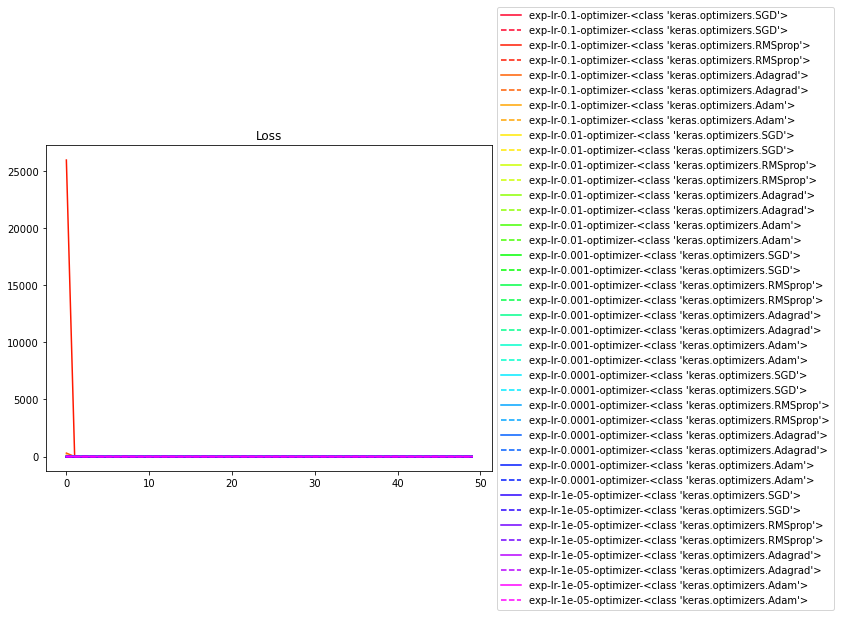

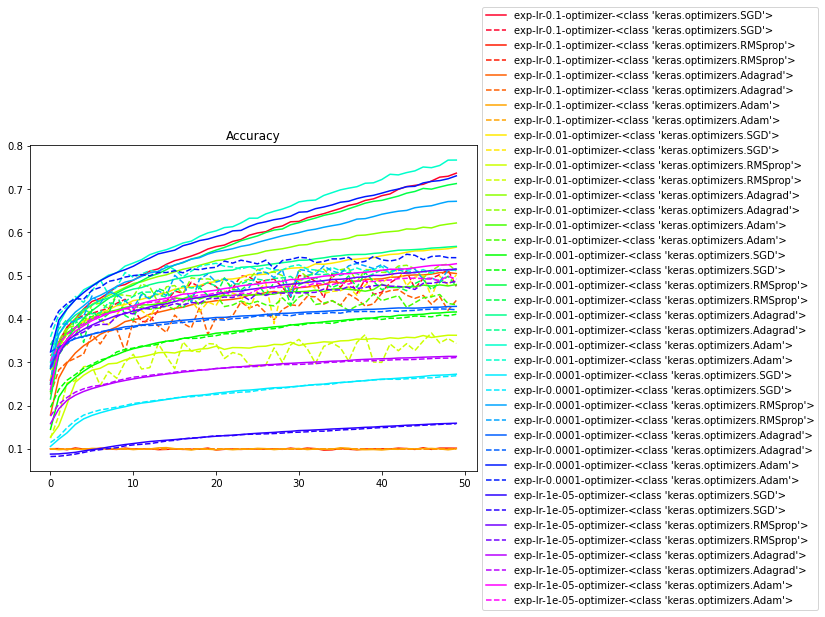

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()